In [1]:
import numpy as np
from pathlib import Path
import re
import matplotlib.pyplot as plt
from scipy import ndimage


In [2]:
with Path("../03.in").open() as f:
    data = f.read().splitlines()


In [3]:
testdata = """\
467..114..
...*......
..35..633.
......#...
617*......
.....+.58.
..592.....
......755.
...$.*....
.664.598..""".splitlines()


## Part 1

- find all numbers adjacent to a symbol (other than a decimal point)
- adjacent also includes diagonal
- calculate the sum of the numbers
- 

In [4]:
testdata2 = np.asarray(list(map(list, testdata)))
data2 = np.asarray(list(map(list, data)))


In [5]:
np.unique(data2)


array(['#', '$', '%', '&', '*', '+', '-', '.', '/', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '=', '@'], dtype='<U1')

In [6]:
id_to_number = {}
ids = np.zeros_like(data2, dtype=int)
mask = np.zeros_like(data2, dtype=bool)

current_id = 1
for i, line in enumerate(data):
    start_idx = 0
    while m := re.search(r"(\d+)", line[start_idx:]):
        start = m.start() + start_idx
        end = m.end() + start_idx
        number = m.group(1)
        # print(f"[{i}, {start}:{end}] = {number}")
        id_to_number[current_id] = int(number)
        ids[i, start:end] = current_id
        current_id += 1
        start_idx += m.end()

    start_idx = 0
    while m := re.search(r"(#|\$|%|&|\*|\+|-|/|=|@)", line[start_idx:]):
        start = m.start() + start_idx
        end = m.end() + start_idx
        symbol = m.group(1)
        # print(f"[{i}, {start}:{end}] = {symbol}")
        mask[i, start:end] = True
        start_idx += m.end()


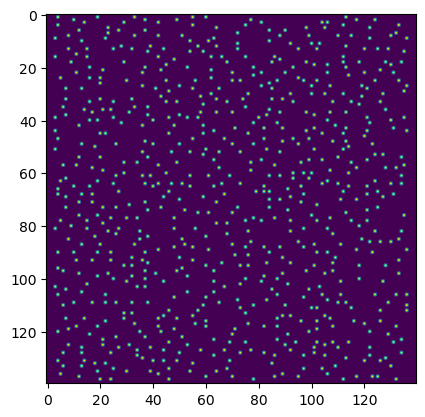

In [7]:
plt.imshow(mask)


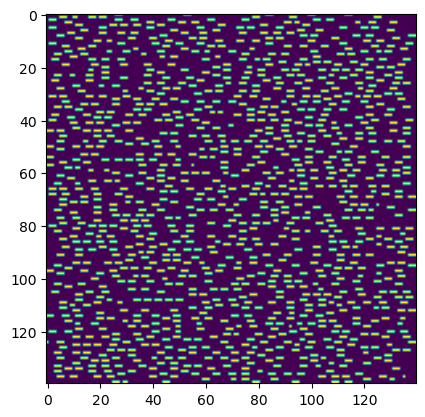

In [8]:
plt.imshow(np.where(ids != 0, 1, 0))


In [9]:
dilation = np.ones((3, 3), dtype=bool)
dilated_mask = ndimage.convolve(mask, dilation, mode="constant", cval=0)


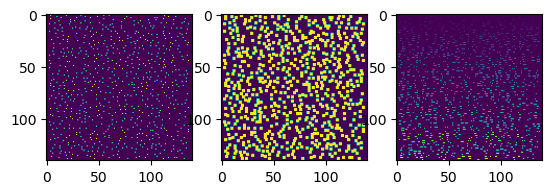

In [10]:
plt.subplot(1, 3, 1)
plt.imshow(mask)
plt.subplot(1, 3, 2)
plt.imshow(dilated_mask)
plt.subplot(1, 3, 3)
plt.imshow(np.where(dilated_mask, ids, 0))
plt.show()


In [11]:
valid_ids = np.unique(np.where(dilated_mask, ids, 0))
valid_ids = valid_ids[valid_ids != 0]


In [12]:
valid_numbers = [id_to_number[id_] for id_ in valid_ids]


In [13]:
np.sum(valid_numbers)


526404

## Part 2

In [14]:
id_to_number = {}
ids = np.zeros_like(data2, dtype=int)
mask = np.zeros_like(data2, dtype=bool)

current_id = 1
for i, line in enumerate(data):
    start_idx = 0
    while m := re.search(r"(\d+)", line[start_idx:]):
        start = m.start() + start_idx
        end = m.end() + start_idx
        number = m.group(1)
        # print(f"[{i}, {start}:{end}] = {number}")
        id_to_number[current_id] = int(number)
        ids[i, start:end] = current_id
        current_id += 1
        start_idx += m.end()

    start_idx = 0
    while m := re.search(r"(\*)", line[start_idx:]):
        start = m.start() + start_idx
        end = m.end() + start_idx
        symbol = m.group(1)
        # print(f"[{i}, {start}:{end}] = {symbol}")
        mask[i, start:end] = True
        start_idx += m.end()


In [15]:
dilation = np.ones((3, 3), dtype=int)
dilated_mask = ndimage.convolve(mask.astype(int), dilation, mode="constant", cval=0)


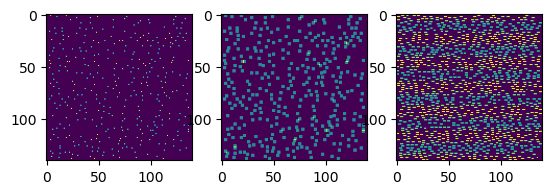

In [16]:
plt.subplot(1, 3, 1)
plt.imshow(mask)
plt.subplot(1, 3, 2)
plt.imshow(dilated_mask)
plt.subplot(1, 3, 3)
plt.imshow(ids > 0)
plt.show()


In [17]:
total_gear_ratio = 0

for i, j in np.argwhere(mask):
    ids_window = ids[i-1:i+2, j-1:j+2]
    found_ids = np.unique(ids_window)
    found_ids = found_ids[found_ids != 0]
    if len(found_ids) == 2:
        gear_ratio = id_to_number[found_ids[0]] * id_to_number[found_ids[1]]
        # print(f"Found gear at ({i}, {j}): {gear_ratio}")
        total_gear_ratio += gear_ratio

total_gear_ratio


Found gear at (1, 4): 122850
Found gear at (1, 19): 133672
Found gear at (2, 10): 22800
Found gear at (2, 49): 787670
Found gear at (2, 77): 332121
Found gear at (2, 124): 520555
Found gear at (3, 29): 638361
Found gear at (4, 75): 178560
Found gear at (5, 23): 298400
Found gear at (5, 64): 636696
Found gear at (5, 98): 191259
Found gear at (5, 122): 572600
Found gear at (6, 90): 139925
Found gear at (8, 33): 102378
Found gear at (8, 42): 392230
Found gear at (8, 88): 162360
Found gear at (8, 99): 388755
Found gear at (9, 122): 775920
Found gear at (10, 84): 193161
Found gear at (12, 64): 424482
Found gear at (12, 113): 487563
Found gear at (13, 8): 262104
Found gear at (13, 15): 319605
Found gear at (13, 32): 73689
Found gear at (13, 44): 232800
Found gear at (13, 125): 35052
Found gear at (13, 129): 203500
Found gear at (14, 54): 544602
Found gear at (16, 3): 226596
Found gear at (16, 15): 385996
Found gear at (16, 75): 603585
Found gear at (18, 29): 150728
Found gear at (18, 85): 11

84399773